In [1]:
# Ignore this section of the tutorial. My machine gives an error when beautiful soup tries to parse so I have to download these
# locally
!pip install html5lib
!pip install lxml

# The Effect of Rest on NBA Teams
*This project was done for the University of Maryland, with all code and prose written by Joe Barresi and Brendan Sacks. This project should serve as a tutorial to learn about the data science process. The data science starts from finding data and finishes with making important policy decisions about said data. Through this tutorial I hope you'll understand how this process achieves this. To help explain the processm the tutorial follows along with a real data science project. It will go through the entire data science process with an NBA schedule to find out whther *

## Introduction
If you follow the NBA (National Basketball Association) it's impossible to not load management being discussed. Load management was popularized when prominent NBA stars began to sit out nationally televised games to not risk injury and worries about poot performance. This led to a growing debate around the league during the 2018-19 season whether players got enough rest, whether the season should be shortened, and things of that nature. When COVID forced the NBA to shut down and restart in the summer of 2020 the NBA fans got to see an experiment. The 2020 season finished on October 11th and the next season tipped off on December 22nd. For all the fans who emphasized the importance of having players rest, this would be a make or break season. The number of stars injured in 2021 was nothing short of extrordinary. Lebron James, Kawhi Leonard, Jamal Murray, Jaylen Brown, Anthony Davis, Mike Conley, James Harden, Chris Paul, and Giannis Antetokounmpo were all injured in the 2021 playoffs. You may not follow the NBA but thats an incredible amount of the biggest NBA stars getting injured - nearly 4 times the normal amount. It's clear this wasn't just some random coincedence of players getting injured - it was in the season where players lacked the most rest. 

To build off this theory of rest effecting players; we were curious how rest impacted NBA teams. How would teams fare on average depending on how much rest they were coming into a game with. Was a team more likely to win if they had more rest then another. How were teams performances coming off back to backs? Were they scoring more or less? You might think that this info is only marginally interesting. However, with sports gambling becoming legalized in more and more states every year - this knowledge could make a much more informed better. It would be interesting to know if considering rest was enough to make a selection. 

The goal is to look at past seasons to test our theories. To do this we want to look at the past ten seasons since those seasons maintain the similair pace of play and intesnsity of the schedule today. If we went back further, we worried that rest would not be as crucial with the slower paces of play but worse recovery techniques. The study will not include the 2019-20 or 2020-21 seasons due to their irregulairty because of shortened COVID-19 seasons. In addition, the 2011-12 season was shortened due to a lockout so this season will also not be included. We will use three delineations popular in the NBA to see how rest impacts teams performance - in addition to just numerical rest in between games. The three popular delineations are the second game in two days (called Back to Back the rest of the study), the 3rd game in 4 days, and the eighth game in 12 days. Throughout the study we will compare how teams did normally in various stastics against when they were faced with one of these three schedule extremities. The statistics being tested will be point differential, winning percentage, and points per game. 

After this study, we hope to know how big an impact rest plays in the season, and how effective is predicting a game based off solely rest. It's important to know how big of an issue teams resting is for the NBA. Should they shorten the season to give teams more rest? How big of a deal is evening out rest in the playoffs? we hope to find all the answers along this study.

## Part 1: Data Collection
The datascience process starts with acquiring our data. For this tutorial we will be Python Jupyter Notebooks to show how it is done. Data can come in infinite forms. Whether its in a CSV, or a website, in an image, or anywhere it can most likely be extracted. Our goal is to get all the raw data we want into our own script so we can modify and analyze the way we want. 

##### These Python libraries are essential for collecting data from websites:

- Requests is a python module that actually sends an HTTP requersts to a given URL. Our utilization of requests is very simple, just a get() from a url. However, requests is very powerful beyond scraping simple HTML. Here's a great resource to advance your knowledge of requests beyond the basics showcased here: https://www.geeksforgeeks.org/python-requests-tutorial/

- BeautifulSoup is an incredibly powerful parsing module. When you request the HTML from a webpage its just a soup of strings. BeautifulSoup truly turns it into a very usable string. It has a built in find method, that fins the data associated with certain html tags. It's a very powerful parser that can help find the data you've been looking for. Here's more on it: https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/

- Pandas is the basis for almost all of the data science we will do throughout the tutorial. I won't list it all out as you'll see its capabilities throughout the tutorial. Here's a link to show how to create your own pandas dataframe structure: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/ and here's more information in how to load real data into a dataframe https://www.geeksforgeeks.org/creating-a-pandas-dataframe/

The process to get from requests into a dataframe is going to be different everytime. It depends how the data is being stored on the website. In most cases, the data will be stored in a table, like our case below. Once you use BeautifulSoup to find the table, pandas has a read_html function to load it into a pandas dataframe. 

In [2]:
# Python libraries for HTTP requests of data from web pages
import requests
from bs4 import BeautifulSoup
import pandas as pd

In our specific case, we will be acquiring data from multiple different webpages, hence the looping over lists to get to those pages. Depending on the case, you will have to adjust your strategy. Below we use the concat function to join to tables together. Here's more on that function https://pandas.pydata.org/docs/reference/api/pandas.concat.html On the same webpage, on the left side you can find out a lot more about the different ways to join tables together

In [3]:
#Lists so that we can iterate over all of the different webpages that contain our schedule
months = ["november", "december", "january", "february", "march", "april", "may", "june"]
years = ["2019", "2018", "2017", "2016", "2015", "2014", "2013", "2011", "2010", "2009"]
#List of the columns on the Website
columns = ['Date', 'Time', 'Away', 'Away Points', 'Home', 'Home Points', 'Box Score', 'Missing Col', 'Attendance', 'Notes']

schedules = {} #Empty dictionary that will hold year followed by dataframe assoc. w/ year
         
for year in years:
    url = "https://www.basketball-reference.com/leagues/NBA_" + year + "_games.html"
    r = requests.get(url)
    root = BeautifulSoup(r.content) #construct a beutifulsoup obj from requests
         
    main_table = root.find("div", {"id": "div_schedule"}).find("table") #on our website, main table is held in this div
    year_table = pd.read_html(str(main_table))[0] #takes our table into actual df
    year_table.columns = columns #renames the columns of our df to our list above
         
    for month in months:
        url = "https://www.basketball-reference.com/leagues/NBA_" + year + "_games-" + month + ".html"
        r = requests.get(url)
        root = BeautifulSoup(r.content)
        main_table = root.find("div", {"id": "div_schedule"}).find("table")
        df = pd.read_html(str(main_table))[0]
        df.columns = columns
        #This continually adds tables in this loop to the original created outside the loop
        year_table = pd.concat([year_table, df], ignore_index=True)
    #add the dataframe created each iteration to the dictionary
    schedules[year] = year_table

By the end of this code running we now have a dictionary populated with year followed by a dataframe with all scheduled games. the data is still very raw but it is effectively scraped

In [4]:
schedules["2019"].head(5)

,Date,Time,Away,Away Points,Home,Home Points,Box Score,Missing Col,Attendance,Notes
0,"Tue, Oct 16, 2018",8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624,NaN
1,"Tue, Oct 16, 2018",10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596,NaN
2,"Wed, Oct 17, 2018",7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889,NaN
3,"Wed, Oct 17, 2018",7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332,NaN
4,"Wed, Oct 17, 2018",7:00p,Memphis Grizzlies,83,Indiana Pacers,111,Box Score,NaN,17923,NaN


# Part 2: Data Processing (Cleaning our Data)

#### Dropping Columns
The above code shows good use of the Pandas function head(). This shows you the first x number of rows in a given dataframe. For our schedules dataframes there are currently ten columns, shown like they were on the basketball reference. The first thing to make our data more usable is to drop the Box Score, Missing Col, Attendance, Time, and Notes columns from our tables. All of these are not useful for examing the relationship between rest and game performance. Its important to only keep the data that is necessary. To drop these columns, we can use the pandas drop() function. This function has a lot of capabilities and more can be found at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

#### Dropping Bad Values
When cleaning code, you want all rows to contain all of the information for each column. It's important to identify missing info and make sure it is marked as NaN. It's also important to think about how you will fill in those values. Since our data source is scores and from a very good website we don't have any missing values. Commonly, there will be many missing values from a data sample and you will need to develop good strategy to replace them. Here's a great resource to help identify why data is missing, and the best strategies to replace them. https://stefvanbuuren.name/fimd/sec-MCAR.html

Our website's only issue is a row that says 'Playoffs' as a border between the regular season games and playoffs. Since we don't want this while analyzing values in rows, we will remove it while looping over each table. The code uses conditional dropping. More can be found here: https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/ 

In [5]:
# A new updated dictionary
updated_schedules = {}
for year, df in schedules.items():
    df.drop(columns=["Box Score", "Missing Col", "Attendance", "Notes", "Time"], inplace=True) #drop bad columns
    updated_schedules[year] = df.drop(df[df.Date == "Playoffs"].index) #removes the Playoff row

After dropping those columns, this is what our dataframes currently look like:

In [6]:
updated_schedules['2019'].head()

,Date,Away,Away Points,Home,Home Points
0,"Tue, Oct 16, 2018",Philadelphia 76ers,87,Boston Celtics,105
1,"Tue, Oct 16, 2018",Oklahoma City Thunder,100,Golden State Warriors,108
2,"Wed, Oct 17, 2018",Milwaukee Bucks,113,Charlotte Hornets,112
3,"Wed, Oct 17, 2018",Brooklyn Nets,100,Detroit Pistons,103
4,"Wed, Oct 17, 2018",Memphis Grizzlies,83,Indiana Pacers,111


Notice in our above code the use of the inplace=True so that we can just update the dataframe instead of having to reassign it.

To continue on our process of cleaning our data, we are going to turn our string dates into an actual datetime object. Date's can be represented in many different ways. So, as a uniform way to represent them In python, there is an object called a datetime object. It's commonly used in data science, and has lots of capabilities. Its also nice to be able to compare only one column pertaining to date and time. Here is more info on datetime objects: https://docs.python.org/3/library/datetime.html. To create the datetime objects we will use string function like slicing and substring to accomplish.

#### Dealing with Our Dates
Since our times come in poor format for numerical analysis, we have to figure out how to strip them in to common datetime elements. Luckily, the datetime module has a function to do exactly that for dates and times that can be seen here: https://www.programiz.com/python-programming/datetime/strptime. Since we deleted our time row since there was no need, we only need to worry about date.

With these functions established, we can now loop over the rows and combine the columns into datetime objects. To loop over all the rows in the dataframe, we will use a method called iterrows(). It's very useful to update values in every row. To access a certain column value, row['col name'] can be used. This is our preffered way of iteration, but the link provided has other ways to do this: https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/

In [7]:
import datetime

for sched in updated_schedules.values():
    for idx, row in sched.iterrows():
        row["Date"] = datetime.datetime.strptime(row["Date"], "%a, %b %d, %Y")

This is what our dataframe looks like after cleaning up all the data that we scraped:

In [8]:
updated_schedules['2019'].head(6)

,Date,Away,Away Points,Home,Home Points
0,2018-10-16 00:00:00,Philadelphia 76ers,87,Boston Celtics,105
1,2018-10-16 00:00:00,Oklahoma City Thunder,100,Golden State Warriors,108
2,2018-10-17 00:00:00,Milwaukee Bucks,113,Charlotte Hornets,112
3,2018-10-17 00:00:00,Brooklyn Nets,100,Detroit Pistons,103
4,2018-10-17 00:00:00,Memphis Grizzlies,83,Indiana Pacers,111
5,2018-10-17 00:00:00,Miami Heat,101,Orlando Magic,104


We have now gotten rid of unncecessary data and have made our date columns more usable. However, when cleaning up our data we want our data to be tidy. Tidy data has one observation per row, and each column should store the value of different variables. The headers should not be variables themselves. In our example, each row encompasses two observation - one for the home team and one for the away team. Awag Points and home points should be one column, just points. In addition each team should have a column determining whether they are home or away. More information on determing tidy data can be found here: http://vita.had.co.nz/papers/tidy-data.pdf

To make the melting process easier a column will be added to show what entry is apart of which game. We do this again by using itterows() to loop over our dataframe.

In [9]:
for year, sched in updated_schedules.items():
    sched['Game'] = ''
    for idx, row in sched.iterrows():
        row["Game"] = str(row['Away']) + " @ " + str(row['Home'])
    updated_schedules[year] = sched
updated_schedules['2019'].head(6)

,Date,Away,Away Points,Home,Home Points,Game
0,2018-10-16 00:00:00,Philadelphia 76ers,87,Boston Celtics,105,Philadelphia 76ers @ Boston Celtics
1,2018-10-16 00:00:00,Oklahoma City Thunder,100,Golden State Warriors,108,Oklahoma City Thunder @ Golden State Warriors
2,2018-10-17 00:00:00,Milwaukee Bucks,113,Charlotte Hornets,112,Milwaukee Bucks @ Charlotte Hornets
3,2018-10-17 00:00:00,Brooklyn Nets,100,Detroit Pistons,103,Brooklyn Nets @ Detroit Pistons
4,2018-10-17 00:00:00,Memphis Grizzlies,83,Indiana Pacers,111,Memphis Grizzlies @ Indiana Pacers
5,2018-10-17 00:00:00,Miami Heat,101,Orlando Magic,104,Miami Heat @ Orlando Magic


#### Melting
Above you can see what our table looks like currently. To achieve our desire of having tidy data, we will use a common data science process called melting. This essentially makes our different column headers that exist as variable into values in our table. Clearly, Home and Away are variables that should exist as values inside our dataframe. In addition, each entry should have one entry for points, depending on whether they're home or away. However, this is complicated for melting functions, so we kept home and away points in the first melt. Melting has a lot of different capabilities. Here's more information on how to use pandas melt functiom: https://pandas.pydata.org/docs/reference/api/pandas.melt.html
The resulting table can be seen below. 

In [ ]:
# Step actually melts our dataframes
for year, sched in updated_schedules.items():
    df = pd.melt(sched, id_vars=['Date','Game', 'Home Points', 'Away Points'], value_vars=['Home', 'Away'], var_name=['Home/Away'], value_name='Team')
    updated_schedules[year] = df.sort_values(['Date', 'Game'])
    
updated_schedules['2009'].head()

Now, we will loop over these schedule dataframes and manually see if a team is home or away before determining what points should be used. A points column is created, and home points and away points are dropped. A column was also added for point differential and results so that it is easy to tell if a team won or loss and how they performed easier. 

In [ ]:
for year, sched in updated_schedules.items():
    #Add new columns before looping over
    sched['Points'] = 0
    sched['Result'] = ''
    sched['Point Differential'] = 0
    
    for idx, row in sched.iterrows():
        hp = int(row['Home Points'])
        ap = int(row['Away Points'])
        #Determine if team should use home or away
        if row["Home/Away"] == "Home":
            sched.at[idx, 'Points'] = hp
            if hp > ap:
                sched.at[idx, 'Result'] = "W"
            else:
                sched.at[idx, 'Result'] = "L"
            sched.at[idx, 'Point Differential'] = hp - ap
        else:
            sched.at[idx, 'Points'] = ap
            if(hp > ap):
                sched.at[idx, 'Result'] = "L"
            else:
                sched.at[idx, 'Result'] = "W"
            sched.at[idx, 'Point Differential'] = ap - hp
    sched.drop(columns=["Home Points", "Away Points"], inplace=True)
    updated_schedules[year] = sched
updated_schedule["2019"].head(6)

## Part 3: Exploratory Data Analysis and Visualization
At this stage in the process, we finally have nice data. Now is the time to use our data to help drive us towards conclusion. This involves using statistics, mathematical process to find out useful information about data. Depending what you are tryimg to do with your data, this step can take many different forms. You could find out information about which machine learning model is most beneficial. You could look at data over time and try to discover trends. There's infinite possibilities. This step can take many forms. A lot of times, it will involve gathering statistics about your data and using some form of visulaization to better understand your data. You want to use this step in the process so that you can better understand your data for furuture steps of making conclusions or implementing machine learning for a model. 

Below are some useful libraries for statistics and graphing. In this step we will mostly be using matplotlib, which is an incredible graphing library. It has many capabilities. Here is a resource to learn about it: https://matplotlib.org/stable/tutorials/index We will also explain how its utilized in our code as well.


In [ ]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np

#### Our Data Analysis
Remember, our specific goal is to find out how important rest is on a teams performance. We will use three statistics to determine team performance. Win percentage (# Wins/ # Games), Points per Game, and Point Differential per game. 

Since we will always be looking at rest, we should add a rest in between game columns for all entries in our tables. To do this, we will use the groupby function so the data will be sorted by team in each indivual year. This is an extremely common function used in data analysis. More information on it can be found at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

In [11]:
for year, sched in updated_schedules.items():
    #Measured in days since last game: So back to back games would be 1 day of rest
    sched['Rest'] = 0
    #Loop over all the different groups returned by grouoby
    for team in sched.groupby(['Team']).groups.keys():
        df = sched.groupby(['Team']).get_group(team)
        
        i = 0 
        prev_idx = -1
        for idx, row in df.iterrows():
            if(i == 0):
                # At start of the season we don't really want to evaluate the rest in between games
                # So we put a value that doesn't make sense of -1, that way we will not include it later
                sched.at[idx, 'Rest'] = -1
            else: 
                sched.at[idx, 'Rest'] = (row['Date'] - sched.at[prev_idx, 'Date']).days
            prev_idx = idx
            i += 1
    updated_schedules[year] = sched
updated_schedules['2019'].head(50)

,Date,Game,Home/Away,Team,Points,Result,Point Differential,Rest
1,2018-10-16,Oklahoma City Thunder @ Golden State Warriors,Home,Golden State Warriors,108,W,8,-1
1313,2018-10-16,Oklahoma City Thunder @ Golden State Warriors,Away,Oklahoma City Thunder,100,L,-8,-1
0,2018-10-16,Philadelphia 76ers @ Boston Celtics,Home,Boston Celtics,105,W,18,-1
1312,2018-10-16,Philadelphia 76ers @ Boston Celtics,Away,Philadelphia 76ers,87,L,-18,-1
6,2018-10-17,Atlanta Hawks @ New York Knicks,Home,New York Knicks,126,W,19,-1
1318,2018-10-17,Atlanta Hawks @ New York Knicks,Away,Atlanta Hawks,107,L,-19,-1
3,2018-10-17,Brooklyn Nets @ Detroit Pistons,Home,Detroit Pistons,103,W,3,-1
1315,2018-10-17,Brooklyn Nets @ Detroit Pistons,Away,Brooklyn Nets,100,L,-3,-1
7,2018-10-17,Cleveland Cavaliers @ Toronto Raptors,Home,Toronto Raptors,116,W,12,-1
1319,2018-10-17,Cleveland Cavaliers @ Toronto Raptors,Away,Cleveland Cavaliers,104,L,-12,-1


Now that every entry has days rested associated with it we can now look at whether the team is playing on a back to back, the 3rd game in four days, or the eighth game in 12 days. These are all delineations that the NBA scheduling department acknwoledges as difficult and tries to evenly distribute them across teams. These metrics will be good to look at for exploratory data analysis before implementing a full model.

A column will be added for B2B, 3in4, and 8in12. It will be a boolean True or False whether the game matches that stipulation. This will allow us to easily group our data and figure out something like record, average ppg, and statsics like for teams. Since we're only exploring our data and not creating a full model this will give us an inkling whether or not rest plays a major factor in NBA games.

We will be using a queue to keep track of the rest days for a teams previous 8 games and previous 4 games. There are two modules, Queue.queue and Collections.deque that implement queues for users. However, I will be using Pythons built-in lists and using pop(0) and append to illustrate a queue. Information on how this is done can be found here: https://www.geeksforgeeks.org/queue-in-python/

In [19]:
for year, sched in updated_schedules.items():
    # By default assume majority of games are not one of these delineations, add the columns
    sched['B2B'] = False
    sched['3in4'] = False
    sched['8in12'] = False
    
    for team in sched.groupby(['Team']).groups.keys():
        df = sched.groupby(['Team']).get_group(team)
        
        i = 0
        # Queues are one less then the number of games because
        # The rest from the first game in the series is kind of irrelevant
        in_12 = []
        in_4 = []
        for idx, row in df.iterrows():
            #If rest is 1 its a back to back
            if i >= 1 and row['Rest'] == 1:
                sched.at[idx, 'B2B'] = True
                
            #Only pop off the oldest game, if queue has been filled
            if i >= 2:
                in_4.pop(0)
            if i >= 7:
                in_12.pop(0)
                
            # Add latest rest from game
            in_12.append(row['Rest'])
            in_4.append(row['Rest'])
            if i >= 2 and sum(in_4) <= 3:
                sched.at[idx, '3in4'] = True
            if i >= 7 and sum(in_12) <= 11:
                sched.at[idx, '8in12'] = True
            i += 1
    updated_schedules[year] = sched
updated_schedules['2018'].sort_values(['8in12'], ascending=False).head(40)

,Date,Game,Home/Away,Team,Points,Result,Point Differential,Rest,B2B,3in4,8in12
1779,2017-12-21,Boston Celtics @ New York Knicks,Away,Boston Celtics,93,L,-9,1,True,True,True
1074,2018-03-22,Los Angeles Lakers @ New Orleans Pelicans,Home,New Orleans Pelicans,128,W,3,1,True,True,True
185,2017-11-11,Minnesota Timberwolves @ Phoenix Suns,Home,Phoenix Suns,118,W,8,1,True,True,True
1892,2018-01-06,Chicago Bulls @ Indiana Pacers,Away,Chicago Bulls,86,L,-39,1,True,True,True
2402,2018-03-24,New Orleans Pelicans @ Houston Rockets,Away,New Orleans Pelicans,91,L,-23,2,False,True,True
0,2017-10-17,Boston Celtics @ Cleveland Cavaliers,Home,Cleveland Cavaliers,102,W,3,-1,False,False,False
876,2018-02-23,Cleveland Cavaliers @ Memphis Grizzlies,Home,Memphis Grizzlies,89,L,-23,9,False,False,False
2188,2018-02-23,Cleveland Cavaliers @ Memphis Grizzlies,Away,Cleveland Cavaliers,112,W,23,1,True,False,False
881,2018-02-23,Dallas Mavericks @ Los Angeles Lakers,Home,Los Angeles Lakers,124,W,22,8,False,False,False
2193,2018-02-23,Dallas Mavericks @ Los Angeles Lakers,Away,Dallas Mavericks,102,L,-22,10,False,False,False


#### Winning Percentage
After adding all of these columns, we can finally start to analyze this data. The most simple way to see if rest plays a factor is to look at the winning percentage of teams in each of these categories. Looking at over 82 games for 30 teams over 10 years allows us to safely apply the central limit to expect a record of around .500 for the average game. So now I'd like to caluclate the winning percentage for teams of in these three categories over this ten year period. If it delineates from .500 its an indication that teams play worse in these delineations.

We calculate winning percentage by sorting by whether a game is a back to back for a team. This gives us total # of back to back games played. Then we sort the group of back to backs by whether a team won. Measuring the length gives us how many teams won a back to back.

In [13]:
#In 2019 there wasn't a single 8 in 12 played. So to not throw an error we will avoid grouping by for that
wins_B2B = 0
wins_3in4 = 0
wins_8in12 = 0

tot_B2B = 0
tot_3in4 = 0
tot_8in12 = 0

wp_B2B = {}
wp_3in4 = {}
wp_8in12 = {}
for year, sched in updated_schedules.items():
    df_B2B = sched.groupby(['B2B']).get_group(True)
    df_3in4 = sched.groupby(['3in4']).get_group(True)
    if(year != '2019'):
        df_8in12 = sched.groupby(['8in12']).get_group(True)
        
    wins_B2B += len(df_B2B[df_B2B['Result'] == 'W'].index)
    tot_B2B += len(df_B2B.index)
    wins_3in4 += len(df_3in4[df_3in4['Result'] == 'W'].index)
    tot_3in4 += len(df_3in4.index)
    
    wp_B2B[int(year)] = len(df_B2B[df_B2B['Result'] == 'W'].index) / len(df_B2B.index)
    wp_3in4[int(year)] = len(df_3in4[df_3in4['Result'] == 'W'].index) / len(df_3in4.index)
    if(year != '2019'):
        wp_8in12[int(year)] = len(df_8in12[df_8in12['Result'] == 'W'].index) / len(df_8in12.index)
        wins_8in12 += len(df_8in12[df_8in12['Result'] == 'W'].index)
        tot_8in12 += len(df_8in12.index)
        

print("Winning Percentage on Back to Backs: ", wins_B2B / tot_B2B)
print("Winning Percentage on 3 in 4s: ", wins_3in4 / tot_3in4)
print("Winning Percentage on 8 in 12s: ", wins_8in12 / tot_8in12)

Winning Percentage on Back to Backs:  0.4372431826671647
Winning Percentage on 3 in 4s:  0.4745152354570637
Winning Percentage on 8 in 12s:  0.42857142857142855


As can be seen above, the winning percentages deviate from a .500 winning percentage. This gives us an indication that rest is an important factor in impacting a teams performance. 

It could also be interesting to see if there's any trend with winning percentages over the ten years. Have teams gotten better or worse at recovery? To look at this trend it would be nice to look at a scatter plot of these values. This doesn't necessarily drive our analysis relating to team performance further, but is interesting. 

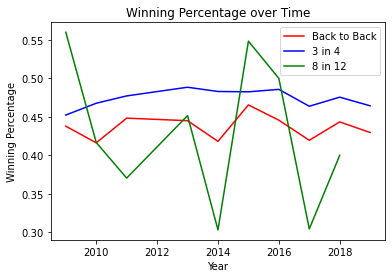

In [14]:
plt.xlabel("Year")
plt.ylabel("Winning Percentage")
plt.plot(wp_B2B.keys(), wp_B2B.values(), "-r", label="Back to Back")
plt.plot(wp_3in4.keys(), wp_3in4.values(), "-b", label="3 in 4")
plt.plot(wp_8in12.keys(), wp_8in12.values(), "-g", label="8 in 12")
plt.legend()
plt.title("Winning Percentage over Time")
plt.show()


The graph above shows no major trend in winning percentages over time increasing or decreasing. However, it shows major variance in the winning percentages of 8 in 12. Both the records of 3 in 4's and B2B's constantly stay above .500 and always maintain B2B's being lower. However, the 8 in 12's jump from abover .500 to as low as .300. I suspect it is due to a very low number of 8in12's that's causing such variance over time. Below I will show the counts for each year to confirm or deny this suspicion.

In [15]:
for year, sched in updated_schedules.items():
    if(year != '2019'):
        df_8in12 = sched.groupby(['8in12']).get_group(True)
        print("Number of 8 in 12s in " + year + ": ", len(df_8in12.index))
print("")

for year, sched in updated_schedules.items():
    df_B2B = sched.groupby(['B2B']).get_group(True)
    print("Number of back to Backs in " + year + ": ", len(df_B2B.index))
print("")

for year, sched in updated_schedules.items():
    df_3in4 = sched.groupby(['3in4']).get_group(True)
    print("Number of 3 in 4s in " + year + ": ", len(df_3in4.index))

Number of 8 in 12s in 2018:  5
Number of 8 in 12s in 2017:  23
Number of 8 in 12s in 2016:  20
Number of 8 in 12s in 2015:  31
Number of 8 in 12s in 2014:  33
Number of 8 in 12s in 2013:  31
Number of 8 in 12s in 2011:  27
Number of 8 in 12s in 2010:  36
Number of 8 in 12s in 2009:  25

Number of back to Backs in 2019:  398
Number of back to Backs in 2018:  433
Number of back to Backs in 2017:  491
Number of back to Backs in 2016:  534
Number of back to Backs in 2015:  580
Number of back to Backs in 2014:  562
Number of back to Backs in 2013:  573
Number of back to Backs in 2011:  600
Number of back to Backs in 2010:  603
Number of back to Backs in 2009:  580

Number of 3 in 4s in 2019:  547
Number of 3 in 4s in 2018:  574
Number of 3 in 4s in 2017:  718
Number of 3 in 4s in 2016:  737
Number of 3 in 4s in 2015:  802
Number of 3 in 4s in 2014:  764
Number of 3 in 4s in 2013:  784
Number of 3 in 4s in 2011:  790
Number of 3 in 4s in 2010:  759
Number of 3 in 4s in 2009:  745


As suspected, the number of 8 in 12s is much lower than the number of B2B's and 3in4 by more than a factor 10. I think this gives us decent qualititative evidence to explain the high variance in 8 in 12's.

#### Points per Game (PPG) and Point Differential
We have explored looking at winning percentage over time for our three delineations and have found that winning percentages for these game are lower than the standard .500. Another interesting analysis would be too look at how teams PPG differ over the season. If we calculate a teams PPG, we can then look at their teams PG in each of the delineations and determine how much less teams score. 

To start we want to calculate teams PPG for year, and will create a new dictionary with year followed by a dataframe with each team and their average point differential and average points per game. We can then calculate their ppg and point differential in our different rest delineations and see if there is a meaningful difference. 

In [20]:
import numpy as np

year_table = []
team_name = []
avg_points_full_rest = []
avg_points_b2b = []
avg_points_3in4 = []
avg_points_8in12 = []

for year, val in updated_schedules.items():
    for team, item in updated_schedules[year].groupby('Team'):
        full_rest = []
        b2b = []
        _3in4 = []
        _8in12 = []
        for index, row in item.iterrows():
            if not row['B2B'] and not row['3in4'] and not row['8in12']:
                full_rest.append(row['Points'])
            if row['B2B']:
                b2b.append(row['Points'])
            if row['3in4']:
                _3in4.append(row['Points'])
            if row['8in12']:
                _8in12.append(row['Points'])

        full_rest = sum(full_rest)/len(full_rest)
        if not len(b2b) == 0:
            b2b = sum(b2b)/len(b2b)
        else:
            b2b = np.nan
        if not len(_3in4) == 0:
            _3in4 = sum(_3in4)/len(_3in4)
        else:
            _3in4 = np.nan
        if not len(_8in12) == 0:
            _8in12 = sum(_8in12)/len(_8in12)
        else:
            _8in12 = np.nan

        year_table.append(year)
        team_name.append(team)
        avg_points_full_rest.append(full_rest)
        avg_points_b2b.append(b2b)
        avg_points_3in4.append(_3in4)
        avg_points_8in12.append(_8in12)

#         print( year, team, [full_rest, b2b, _3in4, _8in12])
#     print('\n')
# print([year_table, team_name, avg_points_full_rest, avg_points_b2b, avg_points_3in4, avg_points_8in12])
ppg_df = pd.DataFrame()
ppg_df['Year'] = year_table
ppg_df['Team'] = team_name
ppg_df['PPG Full Rest'] = avg_points_full_rest
ppg_df['PPG B2B'] = avg_points_b2b
ppg_df['PPG 3in4'] = avg_points_3in4
ppg_df

,Year,Team,PPG Full Rest,PPG B2B,PPG 3in4
0,2019,Atlanta Hawks,113.711864,111.166667,112.578947
1,2019,Boston Celtics,113.289855,104.230769,105.333333
2,2019,Brooklyn Nets,113.484375,105.714286,107.722222
3,2019,Charlotte Hornets,110.827586,109.400000,111.450000
4,2019,Chicago Bulls,104.983333,102.500000,105.333333
...,...,...,...,...,...
295,2009,Sacramento Kings,101.666667,97.181818,99.125000
296,2009,San Antonio Spurs,97.678571,95.388889,94.120000
297,2009,Toronto Raptors,100.442308,94.000000,96.851852
298,2009,Utah Jazz,103.592593,101.523810,102.208333


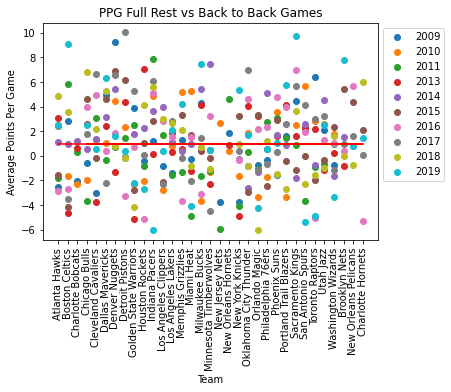

In [21]:
ax = plt.gca()
y_avg = []
for year, val in ppg_df.groupby('Year'):
    plt.scatter(val['Team'], val['PPG Full Rest'] - val['PPG B2B'], label=year)
    plt.xticks(rotation = 90)
    plt.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
    for index, row in val.iterrows():
        y_avg.append(row['PPG Full Rest'] - row['PPG B2B'])
y_avg = np.array(y_avg)
y_avg = [np.median(y_avg)]*30
plt.plot(team_name[:30], y_avg, 'r')
plt.title("PPG Full Rest vs Back to Back Games")
plt.xlabel("Team")
plt.ylabel("Average Points Per Game")
plt.show()

In [22]:
year_table = []
team_name = []
avg_points_full_rest = []
avg_points_b2b = []
avg_points_3in4 = []
avg_points_8in12 = []

for year, val in updated_schedules.items():
    for team, item in updated_schedules[year].groupby('Team'):
        full_rest = []
        b2b = []
        _3in4 = []
        _8in12 = []
        for index, row in item.iterrows():
            if not row['B2B'] and not row['3in4'] and not row['8in12']:
                full_rest.append(row['Point Differential'])
            if row['B2B']:
                b2b.append(row['Point Differential'])
            if row['3in4']:
                _3in4.append(row['Point Differential'])
            if row['8in12']:
                _8in12.append(row['Point Differential'])

        full_rest = sum(full_rest)/len(full_rest)
        if not len(b2b) == 0:
            b2b = sum(b2b)/len(b2b)
        else:
            b2b = np.nan
        if not len(_3in4) == 0:
            _3in4 = sum(_3in4)/len(_3in4)
        else:
            _3in4 = np.nan
        if not len(_8in12) == 0:
            _8in12 = sum(_8in12)/len(_8in12)
        else:
            _8in12 = np.nan

        year_table.append(year)
        team_name.append(team)
        avg_points_full_rest.append(full_rest)
        avg_points_b2b.append(b2b)
        avg_points_3in4.append(_3in4)
        avg_points_8in12.append(_8in12)

#         print( year, team, [full_rest, b2b, _3in4, _8in12])
#     print('\n')
# print([year_table, team_name, avg_points_full_rest, avg_points_b2b, avg_points_3in4, avg_points_8in12])
point_diff_df = pd.DataFrame()
point_diff_df['Year'] = year_table
point_diff_df['Team'] = team_name
point_diff_df['Point Differential Full Rest'] = avg_points_full_rest
point_diff_df['Point Differential B2B'] = avg_points_b2b
point_diff_df['Point Differential 3in4'] = avg_points_3in4
point_diff_df

,Year,Team,Point Differential Full Rest,Point Differential B2B,Point Differential 3in4
0,2019,Atlanta Hawks,-5.508475,-3.916667,-9.157895
1,2019,Boston Celtics,5.492754,-4.846154,-0.066667
2,2019,Brooklyn Nets,0.515625,-8.714286,-4.777778
3,2019,Charlotte Hornets,-0.103448,-6.000000,-3.750000
4,2019,Chicago Bulls,-8.116667,-9.500000,-6.722222
...,...,...,...,...,...
295,2009,Sacramento Kings,-6.866667,-13.727273,-11.000000
296,2009,San Antonio Spurs,3.285714,4.222222,3.320000
297,2009,Toronto Raptors,-2.153846,-6.470588,-3.666667
298,2009,Utah Jazz,4.629630,-7.571429,-0.708333


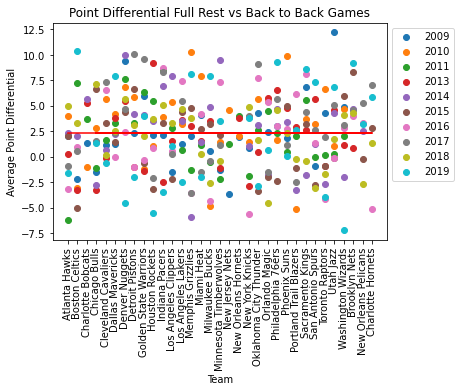

In [23]:
ax = plt.gca()
y_avg = []
for year, val in point_diff_df.groupby('Year'):
    plt.scatter(val['Team'], val['Point Differential Full Rest'] - val['Point Differential B2B'], label=year)
    plt.xticks(rotation = 90)
    plt.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
    for index, row in val.iterrows():
        y_avg.append(row['Point Differential Full Rest'] - row['Point Differential B2B'])
y_avg = np.array(y_avg)
y_avg = [np.median(y_avg)]*30
plt.plot(team_name[:30], y_avg, 'r')
plt.title("Point Differential Full Rest vs Back to Back Games")
plt.xlabel("Team")
plt.ylabel("Average Point Differential")
plt.show()

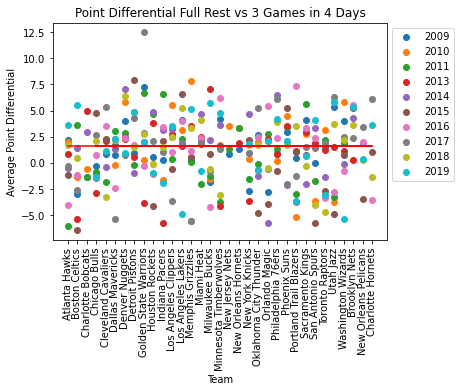

In [24]:
ax = plt.gca()
y_avg = []
for year, val in point_diff_df.groupby('Year'):
    plt.scatter(val['Team'], val['Point Differential Full Rest'] - val['Point Differential 3in4'], label=year)
    plt.xticks(rotation = 90)
    plt.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)
    for index, row in val.iterrows():
        y_avg.append(row['Point Differential Full Rest'] - row['Point Differential 3in4'])
y_avg = np.array(y_avg)
y_avg = [np.median(y_avg)]*30
plt.plot(team_name[:30], y_avg, 'r')
plt.title("Point Differential Full Rest vs 3 Games in 4 Days")
plt.xlabel("Team")
plt.ylabel("Average Point Differential")
plt.show()

## Part 4: Model, Hypothesis Testing, and Machine Learning
At this part of the data science process we have a very good idea of what our data is telling us. However, we'd like to apply some algorithms to give us a model that we can use. We'd like a model that could help us make predictions bout the future, help us classify different objects, etc. There are two major different types of machine learning. Regression and classification. Regression takes different features from an observation and gives out some numerical value for an unknown feature. Classification on the other hand also takes features from an observation and is able to classify it as a certain thing. For our data we will be talkig about regression. There are many different models to use for classification. Since We won't be using classification I won't be writing much about it. Here's a great resource for a classication model: https://machinelearningmastery.com/types-of-classification-in-machine-learning/

In Regression we have some training set of data. It comes with a lot of observations with certain feature values, and then a value for the indeoendent feature. The algorithms goal is to calulcate weights for the different features so that the sum of the feature * the weights is equal or extremely close to the independent variable. There's a mathematical process known as the sum of least squares to determine these weights. There's also alogorithms like gradient descent as well. Here's more informmation about regression: https://www.analyticsvidhya.com/blog/2021/05/5-regression-algorithms-you-should-know-introductory-guide/

After our exploratory data analysis, we can see that teams who face some adversity with lack of resting have a lower win percentage then expected and have 2 points less in point differential. To measure a team having lack of rest, we used three different specific delineations; back to back game, third game in four days, or eight game in 12 days. This only pertained to specific game and was more discrete instead of a contious measure. It would be interesting to predict a teams performance based off the difference in rest between the two teams. We could then use linear regression or some model to determine if there's a relationship between rest and point differential.

Currently in our table we don't have a table for rest differential, so I will add that by iterating over our updated schedules table. It's a little more tricky since we will have to look at two different entries in our table to get rest differential.

In [36]:
for year, sched in updated_schedules.items():
    # By default assume majority of games are not one of these delineations, add the columns
    sched['Rest Differential'] = 0
    # Want to loop over all entries but ignore the first games for teams
    # Reason we made their rest -1 so we could easily filter them out
    for game in sched.groupby(['Game']).groups.keys():
        df = sched.groupby(['Game']).get_group(game)
        
        i = 0
        prev_idx =-1
        for idx, row in df.iterrows():
            if i % 2 == 0:
                prev_idx = idx
            else:
                cur_rest = row['Rest']
                prev_rest = sched.at[prev_idx, 'Rest']
                sched.at[idx, 'Rest Differential'] = cur_rest - prev_rest
                sched.at[prev_idx, 'Rest Differential'] = prev_rest - cur_rest
            i += 1
    updated_schedules[year] = sched
updated_schedules['2018'].head(80)

,Date,Game,Home/Away,Team,Points,Result,Point Differential,Rest,B2B,3in4,8in12,Rest Differential
0,2017-10-17,Boston Celtics @ Cleveland Cavaliers,Home,Cleveland Cavaliers,102,W,3,-1,False,False,False,0
1312,2017-10-17,Boston Celtics @ Cleveland Cavaliers,Away,Boston Celtics,99,L,-3,-1,False,False,False,0
1,2017-10-17,Houston Rockets @ Golden State Warriors,Home,Golden State Warriors,121,L,-1,-1,False,False,False,0
1313,2017-10-17,Houston Rockets @ Golden State Warriors,Away,Houston Rockets,122,W,1,-1,False,False,False,0
8,2017-10-18,Atlanta Hawks @ Dallas Mavericks,Home,Dallas Mavericks,111,L,-6,-1,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1349,2017-10-22,Atlanta Hawks @ Brooklyn Nets,Away,Atlanta Hawks,104,L,-12,2,False,False,False,0
38,2017-10-22,Minnesota Timberwolves @ Oklahoma City Thunder,Home,Oklahoma City Thunder,113,L,-2,1,True,True,False,-1
1350,2017-10-22,Minnesota Timberwolves @ Oklahoma City Thunder,Away,Minnesota Timberwolves,115,W,2,2,False,False,False,1
39,2017-10-22,New Orleans Pelicans @ Los Angeles Lakers,Home,Los Angeles Lakers,112,L,-7,2,False,True,False,0


Now our dataframe has two values rest differential and point differential. One represents team performance, and the other represents how much rest a team has. Let's plot the values against eachother and see if theres any noticable trend at all. First I'll create a new dataframe that has every year in one. For simplicity I'm just going to add all year dataframes to one.

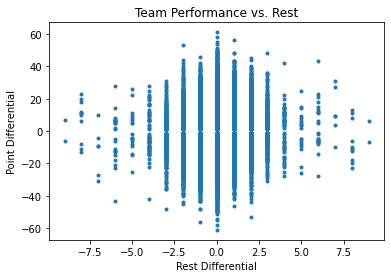

In [44]:
master_schedule = updated_schedules["2019"]
for year, sched in updated_schedules.items():
    if year != '2019':
        master_schedule = pd.concat([sched, master_schedule])

master_schedule.head()
plt.xlabel("Rest Differential")
plt.ylabel("Point Differential")
plt.plot(master_schedule['Rest Differential'], master_schedule['Point Differential'], '.')
plt.title("Team Performance vs. Rest")
plt.show()

Above, I tried this plot as a learning experience. There are numerous times, when a scatter plot will not simply give all the answers you desire. It's impossible to see any trends from this data because the data is too concentrated to see high frequencies of it. Below, I try using a violin plot that has width 

Text(0, 0.5, 'Point Differential')

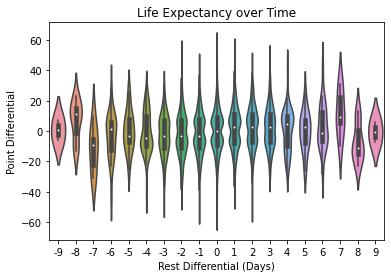

In [46]:
#!pip install seaborn
import seaborn
plt.title("Point Differential vs Life Expectancy")
seaborn.violinplot(x = master_schedule["Rest Differential"], y = master_schedule["Point Differential"])
plt.xlabel("Rest Differential (Days)")
plt.ylabel("Point Differential")

From our two graphs its difficult to determine whether there is a relationship between rest and team performance. From the violin plot, there appears to not be a strong relationship, but too confirm we will use linear regression. SKlearn has a linear regression model and so do many different libraries. Howevery, I will be using the statsmodel version for linear regression model. Its model comes with lots of summary statstics that I generated below. For a lot more information about statsmodel and its summary statistics: https://www.statsmodels.org/stable/regression.html

In [48]:
import statsmodels.api as sm
regression_model = sm.OLS(master_schedule['Rest Differential'], master_schedule['Point Differential']).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rest Differential   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              190.2
Date:                Sun, 19 Dec 2021   Prob (F-statistic):                    4.12e-43
Time:                        23:11:23   Log-Likelihood:                         -39732.
No. Observations:               26262   AIC:                                  7.947e+04
Df Residuals:                   26261   BIC:                                  7.947e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Point Differential     0.0068      0.000     13.790      0.000       0.006       0.008
==============================================================================
Omnibus:                     3449.066   Durbin-Watson:                   3.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44665.218
Skew:                           0.000   Prob(JB):                         0.00
Kurtosis:                       9.389   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Evaluation of Model
For a good linear regression model, the R^2 should approach 1. Ours is a very poor 0.07. There appears to be no relationship between rest differential and point differential. However our exploratory data analysis did show difference in winning percentage and point differential between the three delineations. These different findings will impact our interpretations of rest on the NBA.

For different machine learning models, there is a very popular form of evaluation known as cross-validation. Since its clear our linear regression is very poor, I will not be doing this. However, here's a great article on exactly what it is and how to use sklearn to utilize it: https://scikit-learn.org/stable/modules/cross_validation.html

## Part 5: Interpretation

In [ ]:
for year, sched in updated_schedules.items():
    